# Regresión Ridge y Lasso

## Importaciones

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

from sklearn.linear_model import RidgeCV, LassoCV
# from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

## Generación de los datos

Para este ejemplo, vamos a usar el conjunto de datos [Boston](https://www.kaggle.com/datasets/avish5787/boston-data-set]). En él, tenemos datos sobre 506 casas y la zona en las que están situadas. Ahora, vamos a intentar predecir la variable `MEDV`, el valor mediano de las casas de de propietarios.

Este conjunto de datos es famoso porque es un buen ejemplo para explicar conceptos de Machine Learning. Recientemente, los mantainers de `scikit-learn` han decidido eliminar definitivamente este conjunto de datos a raíz de este [artículo](https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8). Las dos claves polémicas son:

1. Racismo. Cualquier modelo que usemos dará como importante la variable `B`, que hace referencia a la proporción de gente de color que vive en ese vecindario. 

2. No cumple el propósito para el cual se creó: "The goal of the research that led to the creation of this dataset was to study the impact of air quality but it did not give adequate demonstration of the validity of this assumption."

In [2]:
boston = pd.read_csv("./datos/Boston_modificado.csv")
boston = pd.get_dummies(boston)

X = boston.loc[:,boston.columns != 'medv']
y = boston.loc[:,boston.columns == 'medv'].to_numpy()[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
def RegularizationCV(lambdas = 20, modelcv = RidgeCV, cv = 10, title = 'RidgeCV'):

    coefs = []
    for a in lambdas:
        ridge = modelcv(alphas=[a], cv=cv)
        ridge.fit(X_train, y_train)
        coefs.append(ridge.coef_)

    ax = plt.gca()

    ax.plot(lambdas, coefs)
    plt.xlabel('lambda')
    plt.ylabel('Coeficientes')
    plt.title(title)
    plt.axis('tight')
    plt.show()

    return coefs

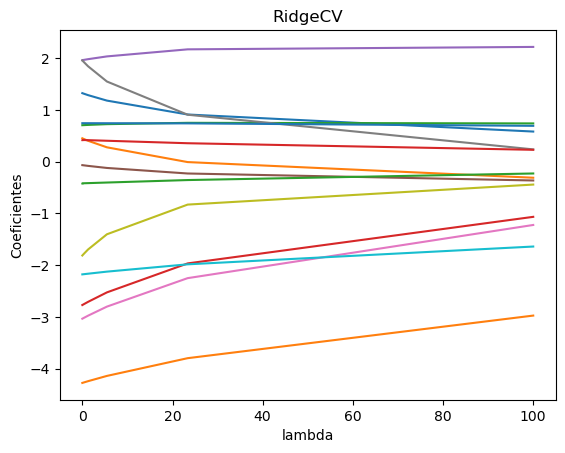

In [4]:
bb = RegularizationCV(lambdas = np.logspace(-10, 2, 20), modelcv = RidgeCV, cv = 10, title = 'RidgeCV')

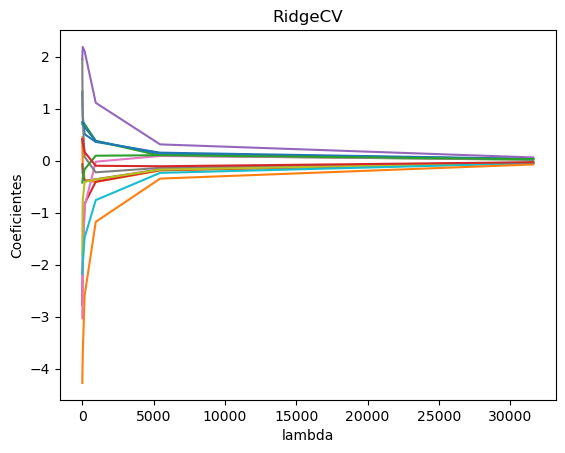

[array([ 1.32272028,  0.4508223 ,  0.70372367, -2.76913468,  1.96002067,
        -0.06753468, -3.03311449,  1.95472574, -1.81248901, -2.17705931,
         0.74248984, -4.27347983, -0.42082823,  0.41579313]),
 array([ 1.32272028,  0.4508223 ,  0.70372367, -2.76913468,  1.96002067,
        -0.06753468, -3.03311449,  1.95472574, -1.81248901, -2.17705931,
         0.74248984, -4.27347983, -0.41884091,  0.41778046]),
 array([ 1.32272028,  0.4508223 ,  0.70372367, -2.76913468,  1.96002067,
        -0.06753468, -3.03311449,  1.95472574, -1.81248901, -2.17705931,
         0.74248984, -4.27347983, -0.41837191,  0.41824946]),
 array([ 1.32272028,  0.4508223 ,  0.70372367, -2.76913468,  1.96002067,
        -0.06753468, -3.03311449,  1.95472574, -1.81248901, -2.17705931,
         0.74248984, -4.27347983, -0.41832751,  0.41829386]),
 array([ 1.32272027,  0.4508223 ,  0.70372367, -2.76913468,  1.96002067,
        -0.06753468, -3.03311448,  1.95472573, -1.812489  , -2.17705931,
         0.74248984, -

In [5]:
RegularizationCV(lambdas = np.logspace(-10, 4.5, 20), modelcv = RidgeCV, cv = 10, title = 'RidgeCV')

R2:0.478, MSE:47.82, RMSE:6.92


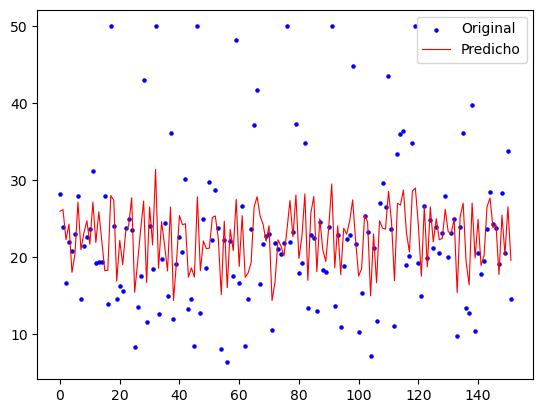

In [6]:
def regpredict(X_train, y_train, X_test, y_test, lambd = 1000, modelcv = RidgeCV, cv = 10):

    ridge = modelcv(alphas=[lambd], cv=10)
    ridge.fit(X_train, y_train)
    ypred = ridge.predict(X_test)
    score = ridge.score(X_test, y_test)
    mse = mean_squared_error(y_test,ypred)
    print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}".format(score, mse, np.sqrt(mse)))

    x_ax = range(len(X_test))
    plt.scatter(x_ax, y_test, s=5, color="blue", label="Original")
    plt.plot(x_ax, ypred, lw=0.8, color="red", label="Predicho")
    plt.legend()
    plt.show()

regpredict(X_train, y_train, X_test, y_test, lambd = 1000, modelcv = RidgeCV, cv = 10)

## Regresión Lasso

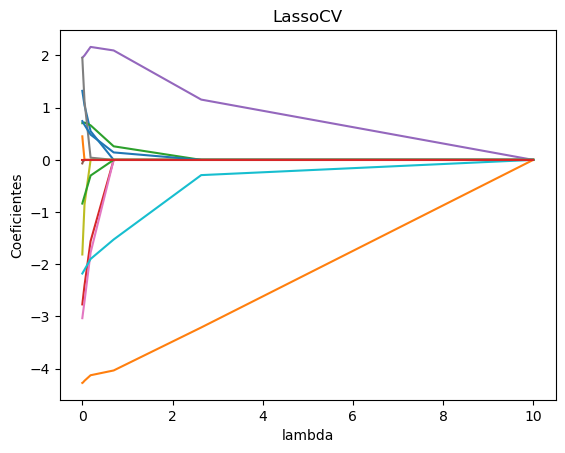

[array([ 1.32272028e+00,  4.50822304e-01,  7.03723670e-01, -2.76913468e+00,
         1.96002067e+00, -6.75346763e-02, -3.03311449e+00,  1.95472574e+00,
        -1.81248901e+00, -2.17705931e+00,  7.42489845e-01, -4.27347983e+00,
        -8.36621367e-01,  1.32919943e-17]),
 array([ 1.32272028e+00,  4.50822301e-01,  7.03723671e-01, -2.76913468e+00,
         1.96002067e+00, -6.75346756e-02, -3.03311448e+00,  1.95472574e+00,
        -1.81248900e+00, -2.17705931e+00,  7.42489844e-01, -4.27347983e+00,
        -8.36621366e-01,  2.50761170e-14]),
 array([ 1.32272027e+00,  4.50822290e-01,  7.03723671e-01, -2.76913467e+00,
         1.96002067e+00, -6.75346730e-02, -3.03311448e+00,  1.95472572e+00,
        -1.81248898e+00, -2.17705931e+00,  7.42489843e-01, -4.27347983e+00,
        -8.36621363e-01,  1.83981346e-15]),
 array([ 1.32272025e+00,  4.50822250e-01,  7.03723672e-01, -2.76913464e+00,
         1.96002067e+00, -6.75346631e-02, -3.03311445e+00,  1.95472565e+00,
        -1.81248890e+00, -2.1770

In [7]:
RegularizationCV(lambdas = np.logspace(-10, 1, 20), modelcv = LassoCV, cv = 10, title = 'LassoCV')

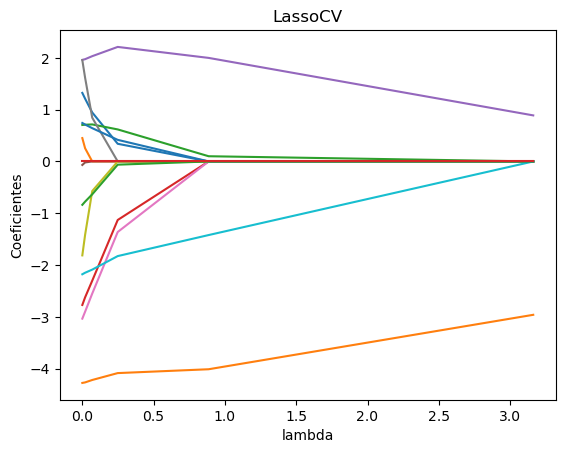

[array([ 1.32272028e+00,  4.50822304e-01,  7.03723670e-01, -2.76913468e+00,
         1.96002067e+00, -6.75346763e-02, -3.03311449e+00,  1.95472574e+00,
        -1.81248901e+00, -2.17705931e+00,  7.42489845e-01, -4.27347983e+00,
        -8.36621367e-01,  1.32919943e-17]),
 array([ 1.32272028e+00,  4.50822301e-01,  7.03723671e-01, -2.76913468e+00,
         1.96002067e+00, -6.75346756e-02, -3.03311448e+00,  1.95472574e+00,
        -1.81248900e+00, -2.17705931e+00,  7.42489844e-01, -4.27347983e+00,
        -8.36621366e-01,  1.64704206e-14]),
 array([ 1.32272027e+00,  4.50822292e-01,  7.03723671e-01, -2.76913467e+00,
         1.96002067e+00, -6.75346734e-02, -3.03311448e+00,  1.95472572e+00,
        -1.81248898e+00, -2.17705931e+00,  7.42489843e-01, -4.27347983e+00,
        -8.36621363e-01,  4.59884724e-15]),
 array([ 1.32272025e+00,  4.50822259e-01,  7.03723672e-01, -2.76913465e+00,
         1.96002067e+00, -6.75346653e-02, -3.03311446e+00,  1.95472566e+00,
        -1.81248892e+00, -2.1770

In [8]:
RegularizationCV(lambdas = np.logspace(-10, 0.5, 20), modelcv = LassoCV, cv = 10, title = 'LassoCV')

R2:0.714, MSE:26.23, RMSE:5.12


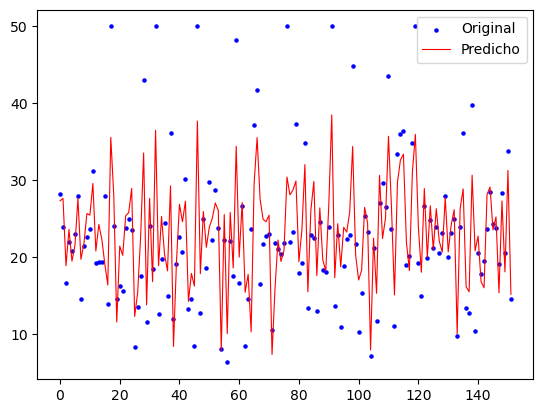

In [9]:
regpredict(X_train, y_train, X_test, y_test, lambd = 0.5, modelcv = LassoCV, cv = 10)

## PLS

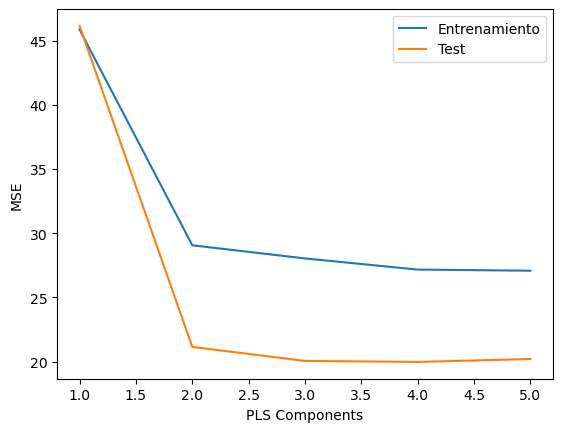

R2:0.694, MSE:20.06, RMSE:4.48


In [12]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale

#define cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

mse = []
mse_test = []
n = len(X_train)

for i in np.arange(1, 6):
    pls = PLSRegression(n_components=i)
    
    score = -1 * cross_val_score(pls, X_train, y_train, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)

    score_test = -1 * cross_val_score(pls, X_test, y_test, cv=cv, scoring='neg_mean_squared_error').mean()
    mse_test.append(score_test)

#plot test MSE vs. number of components
plt.plot(range(1, len(mse_test) + 1), mse, label = "Entrenamiento")
plt.plot(range(1, len(mse_test) + 1), mse_test, label = "Test")
plt.legend()
plt.xlabel('PLS Components')
plt.ylabel('MSE')
plt.show()


pls = PLSRegression(n_components=3)
pls.fit(X_train, y_train)
score_test = -1 * cross_val_score(pls, X_test, y_test, cv=cv, scoring='neg_mean_squared_error').mean()
score_test_r2 = cross_val_score(pls, X_test, y_test, cv=cv, scoring='r2').mean()
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}".format(score_test_r2, score_test, np.sqrt(score_test)))

## Comparación de los modelos

Observamos que en la regresión Ridge, al aumentar $\lambda$ se produce una disminución significativa de los coeficientes, pero nunca llegan a 0, pero por el contrario en la regresión Lasso sí que llegan a valer 0, y es precisamente por esa modificación en la función de la penalización.

Si atendemos a los estadísticos de predicción, con Ridge en el conjunto de test obtenemos `R2:0.490, MSE:46.75, RMSE:6.84` y con Lasso `R2:0.714, MSE:26.23, RMSE:5.12` por lo que este último es mejor. Además, 5 estimadores de los $\beta$ de las variables se han convertido en 0, por lo que se pueden eliminar.

Si añadimos el PLS, es el mejor de todos puesto que obtenemos unos resultados en test de `R2:0.708, MSE:19.71, RMSE:4.44`.